# 3D Plots of Lorenz Attractors

The Lorenz attractors are a set of 3 coupled differential equations that, while simple in form, lead to highly nonlinear behavior. See [Notebook 1 - What Are Lorenz Attractors](1 What Are Lorenz Attractors.ipynb). The differential equations are given by:

$$
\dfrac{dx}{dt} = \sigma (y-x) \\
\dfrac{dy}{dt} = rx - y - xz \\
\dfrac{dz}{dt} = xy - bz 
$$

These can be integrated using `scipy.integrate.odeint`, which is illustrated in Notebook 1. Here, we use convenience functions to make plotting easier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from lorenz_rhs import lorenz, get_lorenz_solution

In [4]:
in_0 = [5.0, 5.0, 5.0]
t_max = 20
t_steps = 20000
t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                            (10.0, 8/3, 28))

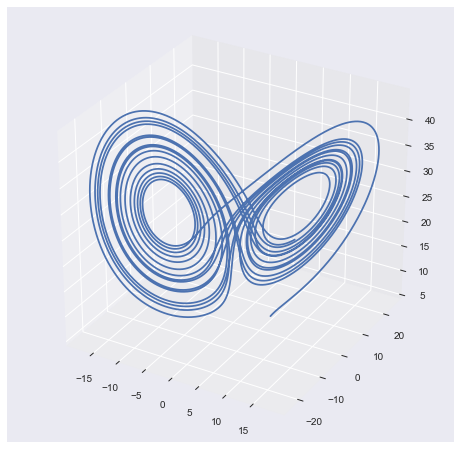

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solx, soly, solz)
plt.show()

This is perhaps the most famous plot of the Lorenz attractors, tied up with the "butterfly effect."

What does it mean, the "butterfly effect"? The term refers to an allegory, that the puffs of wind created by a butterfly flapping its wings in Japan can amass into a hurricane crossing the Pacific. The mathematical concept is that the system is extremely sensitive to changes in the input. 

To illustrate that, let's integrate the Lorenz attractors for 1 million timesteps, starting with two inputs that differ by 0.0001:

In [6]:
t_max = 1000
t_steps = t_max/0.001

in_1 = [5.0, 5.0, 5.0]
t1, [solx1, soly1, solz1] = get_lorenz_solution(in_1, t_max, t_steps, 
                                            (10.0, 8/3, 80))

in_2 = [5.0001,5.0001,5.0001]
t2, [solx2, soly2, solz2] = get_lorenz_solution(in_2, t_max, t_steps, 
                                            (10.0, 8/3, 80))

When we visualize the last 10,000 steps of the two solution vectors, there are noticable differences: while they still follow the same overall pattern that all Lorenz attractors follow, the path they take through $(x,y,z)$ space deviates enough to be noticable.

In [7]:
from seaborn import xkcd_palette as xkcd
blue, red = xkcd(['denim blue','brick red'])

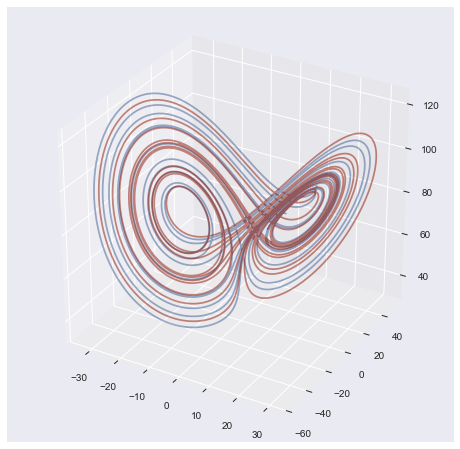

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solx1[-10000:],soly1[-10000:],solz1[-10000:],color=blue,alpha=0.5)
ax.plot(solx2[-10000:],soly2[-10000:],solz2[-10000:],color=red,alpha=0.5)
plt.show()

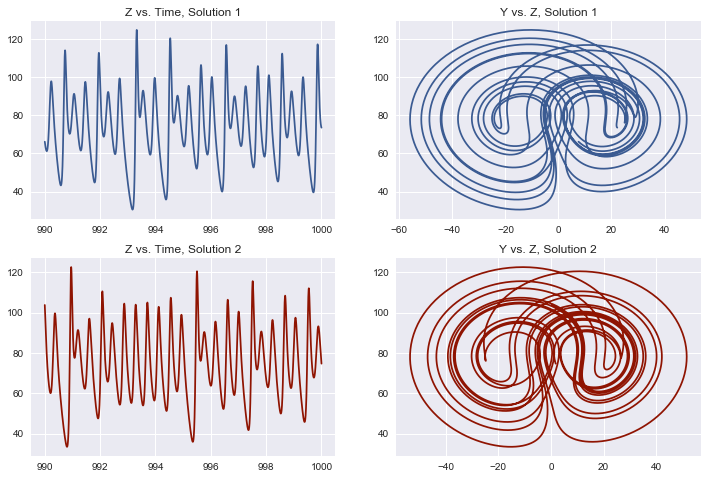

In [9]:
fig = plt.figure(figsize=(12,8))
ax1, ax2, ax3, ax4 = [fig.add_subplot(2,2,i+1) for i in range(4)]

ax1.plot(t1[-10000:], solz1[-10000:], color=blue)
ax1.set_title("Z vs. Time, Solution 1")

ax2.plot(soly1[-10000:], solz1[-10000:], color=blue)
ax2.set_title("Y vs. Z, Solution 1")

ax3.plot(t2[-10000:], solz2[-10000:], color=red)
ax3.set_title("Z vs. Time, Solution 2")

ax4.plot(soly2[-10000:], solz2[-10000:], color=red)
ax4.set_title("Y vs. Z, Solution 2")

plt.show()

In [10]:
colors = ['dark green',     'denim blue',  'brick red', 'navy blue',
          'plum',           'olive green', 'azure',     'magenta',
          'turquoise blue', 'umber',       'marine',    'dark green',
          'forest green',   'cornflower',  'terracotta','sage green']

colorz = xkcd(colors)

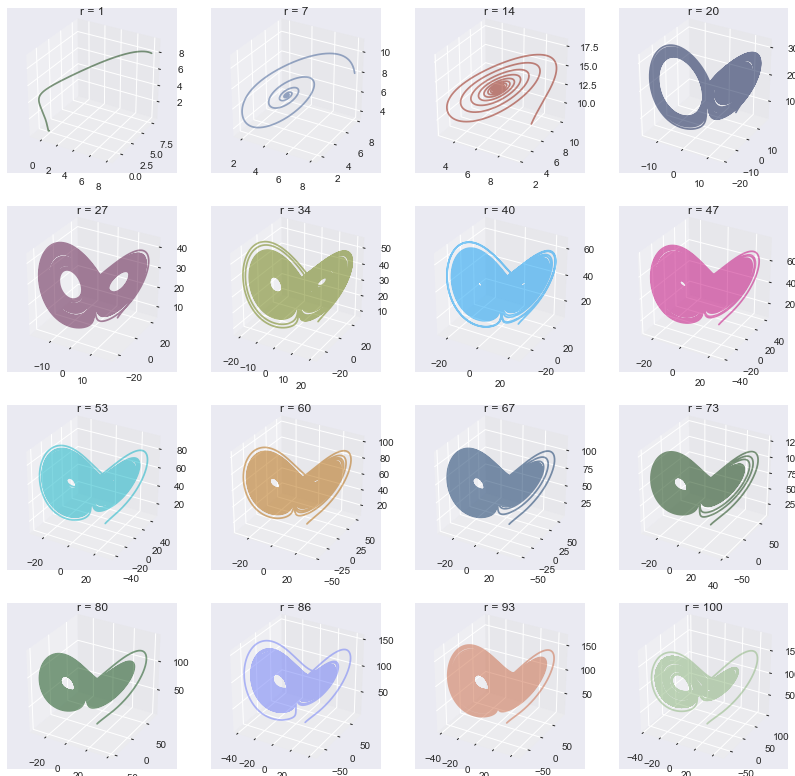

In [11]:
rz = list(np.linspace(1,100,16))

fig = plt.figure(figsize=(14,14))
axes = [fig.add_subplot(4, 4, i+1, projection='3d') for i in range(len(rz))]

for r, color, ax in zip(rz, colorz, axes):
    t_max = 100
    t_steps = t_max/0.001
    
    in_0 = [8.0, 8.0, 8.0]
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, 8/3, r))
    ax.plot(solx, soly, solz, color=color, alpha=0.5)
    ax.set_title("r = %d"%(r))
            
plt.show()

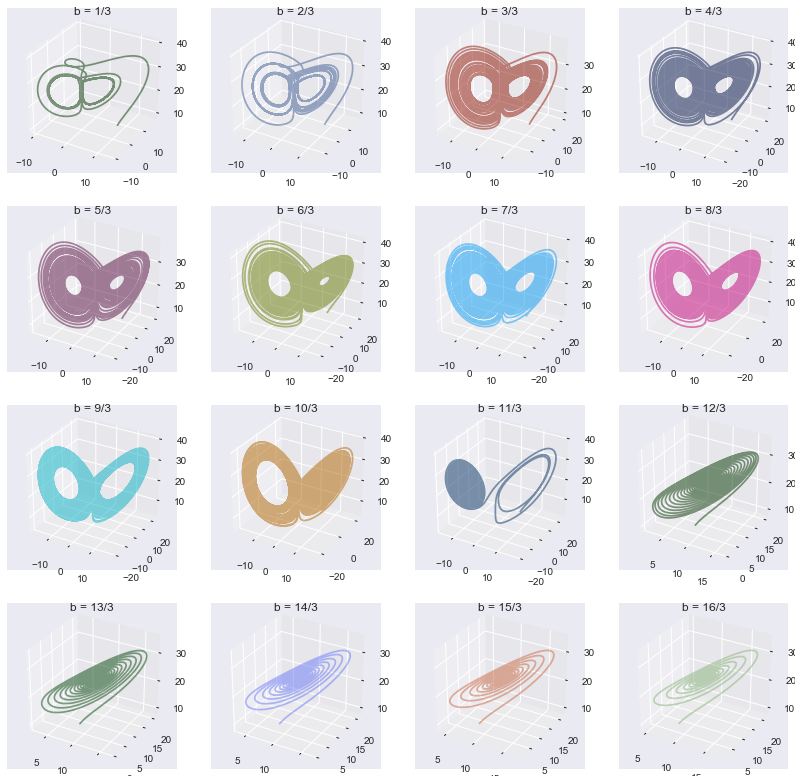

In [19]:
bz = list(np.linspace(1,16,16))
r = 25

fig = plt.figure(figsize=(14,14))
axes = [fig.add_subplot(4, 4, i+1, projection='3d') for i in range(len(rz))]

for b, color, ax in zip(bz, colorz, axes):
    t_max = 100
    t_steps = t_max/0.001
    
    in_0 = [8.0, 8.0, 8.0]
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (10.0, b/3, r))
    ax.plot(solx, soly, solz, color=color, alpha=0.5)
    ax.set_title("b = %d/3"%(b))
            
plt.show()

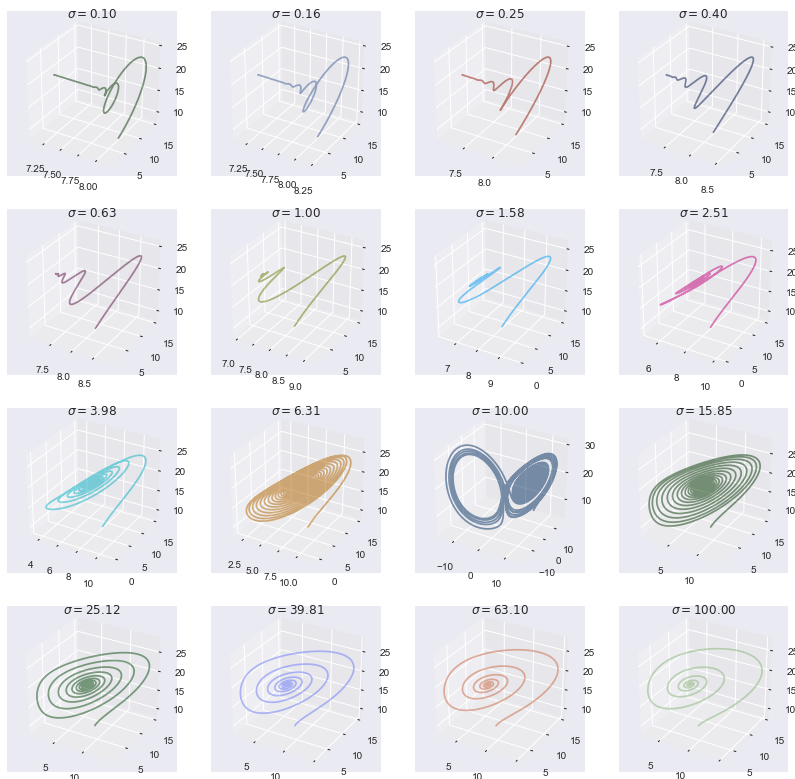

In [18]:
bz = list(np.linspace(1,16,16))
r = 20
b = 8/3
sigmaz = list(np.logspace(-1,2,16))

fig = plt.figure(figsize=(14,14))
axes = [fig.add_subplot(4, 4, i+1, projection='3d') for i in range(len(rz))]

for sigma, color, ax in zip(sigmaz, colorz, axes):
    t_max = 100
    t_steps = t_max/0.001
    
    in_0 = [8.0, 8.0, 8.0]
    t, [solx, soly, solz] = get_lorenz_solution(in_0, t_max, t_steps, 
                                                (sigma, b, r))
    ax.plot(solx, soly, solz, color=color, alpha=0.5)
    ax.set_title(r"$\sigma = %0.2f$"%(sigma))

plt.show()